### Imports

In [1]:
import pandas as pd
import numpy as np

import functions.visualization_functions as VisualizationFunctions
import functions.model_functions as ModelFunctions

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

## Dataset

In [2]:
df_churn_processed = pd.read_csv('datasets/churn_pre_processed.csv')

In [3]:
df_churn_processed.head()

,gender,age,married,n_of_dependents,n_of_referrals,tenure_in_months,offer,phone_service,multiple_lines,internet_service,...,streaming_music,unlimited_data,contract,paperless_billing,payment_method,ttl_refunds,ttl_extra_data_chg,ttl_l_distance_chg,ttl_revenue,customer_status
0,Female,37,Yes,0,2.0,9,No Offer,Yes,No,Yes,...,No,Yes,One Year,Yes,Credit Card,0.00,0,381.51,974.81,0
1,Male,46,No,0,0.0,9,No Offer,Yes,Yes,Yes,...,Yes,No,Month-to-Month,No,Credit Card,38.33,10,96.21,610.28,0
2,Male,50,No,0,0.0,4,Offer E,Yes,No,Yes,...,No,Yes,Month-to-Month,Yes,Bank Withdrawal,0.00,0,134.60,415.45,1
3,Male,78,Yes,0,1.0,13,Offer D,Yes,No,Yes,...,No,Yes,Month-to-Month,Yes,Bank Withdrawal,0.00,0,361.66,1599.51,1
4,Female,75,Yes,0,3.0,3,No Offer,Yes,No,Yes,...,No,Yes,Month-to-Month,Yes,Credit Card,0.00,0,22.14,289.54,1


In [4]:
print(df_churn_processed.columns.tolist())

['gender', 'age', 'married', 'n_of_dependents', 'n_of_referrals', 'tenure_in_months', 'offer', 'phone_service', 'multiple_lines', 'internet_service', 'internet_type', 'avg_monthly_gb_download', 'online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data', 'contract', 'paperless_billing', 'payment_method', 'ttl_refunds', 'ttl_extra_data_chg', 'ttl_l_distance_chg', 'ttl_revenue', 'customer_status']


In [5]:
df_churn_processed.shape

(4925, 28)

## Pré Processamento

In [6]:
TARGET = 'customer_status'
R_STATE = 42

In [7]:
X_train, X_test, y_train, y_test = ModelFunctions.model_train_test(df_churn_processed, TARGET)

In [8]:
print(f'X_train - Proporção da classe 0: {y_train.value_counts(normalize=True)[0]}')
print(f'y_train - Proporção da classe 1: {y_train.value_counts(normalize=True)[1]}')
print(f'X_test - Proporção da classe 0: {y_train.value_counts(normalize=True)[0]}')
print(f'y_test - Proporção da classe 1: {y_train.value_counts(normalize=True)[1]}')

X_train - Proporção da classe 0: 0.6771105308964317
y_train - Proporção da classe 1: 0.3228894691035683
X_test - Proporção da classe 0: 0.6771105308964317
y_test - Proporção da classe 1: 0.3228894691035683


In [9]:
X_train_processed, X_test_processed = ModelFunctions.model_pre_process(df_churn_processed, TARGET, X_train, X_test)

## Modelagem

In [14]:
ModelFunctions.mlflow_up('Predição de Churn - modelagem supervisionada')

2024/12/01 16:49:20 INFO mlflow.tracking.fluent: Experiment with name 'Predição de Churn - modelagem supervisionada' does not exist. Creating a new experiment.


### SVM

In [15]:
svm_model = SVC(random_state=R_STATE)

In [16]:
svm_rs_run_id, svm_rs_model = ModelFunctions.supervised_rand_search_cv(
    svm_model, 
    ModelFunctions.PARAM_GRID_SVM, 
    X_train_processed, 
    X_test_processed, 
    y_train, 
    y_test
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


2024/12/01 16:57:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Supervised_RandomSearchCV_SVC at: http://127.0.0.1:5000/#/experiments/641201155062328783/runs/cbb0642a4ea5497eb461207440afd749.
2024/12/01 16:57:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/641201155062328783.


MLflow Run ID: cbb0642a4ea5497eb461207440afd749
Melhores parâmetros: {'kernel': 'linear', 'gamma': 'scale', 'degree': 2, 'C': 1}
Precisão (acurácia): 0.8531799729364006


### XGBoost

In [18]:
xgb_model = XGBClassifier()

In [19]:
xgb_rs_run_id, xgb_rs_model = ModelFunctions.supervised_rand_search_cv(
    xgb_model, 
    ModelFunctions.PARAM_GRID_XGB, 
    X_train_processed, 
    X_test_processed, 
    y_train, 
    y_test
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


2024/12/01 18:59:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Supervised_RandomSearchCV_XGBClassifier at: http://127.0.0.1:5000/#/experiments/641201155062328783/runs/bdb77f6041574a5cac9e557b713931f5.
2024/12/01 18:59:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/641201155062328783.


MLflow Run ID: bdb77f6041574a5cac9e557b713931f5
Melhores parâmetros: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
Precisão (acurácia): 0.8653585926928281


### GradientBoost

In [20]:
grad_model = GradientBoostingClassifier(random_state=R_STATE)

In [21]:
grad_rs_rund_id, grad_rs_model = ModelFunctions.supervised_rand_search_cv(
    grad_model, 
    ModelFunctions.PARAM_GRID_GRADIENTBOOST, 
    X_train_processed, 
    X_test_processed, 
    y_train, 
    y_test
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


2024/12/01 19:02:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Supervised_RandomSearchCV_GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/641201155062328783/runs/36a7f63dcdd94369933a46cff0c0a03b.
2024/12/01 19:02:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/641201155062328783.


MLflow Run ID: 36a7f63dcdd94369933a46cff0c0a03b
Melhores parâmetros: {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.1}
Precisão (acurácia): 0.8694181326116374


### AdaBoost

In [22]:
ada_model = AdaBoostClassifier(random_state=R_STATE)

In [23]:
ada_rs_rund_id, ada_rs_model = ModelFunctions.supervised_rand_search_cv(
    ada_model, 
    ModelFunctions.PARAM_GRID_ADABOOST, 
    X_train_processed, 
    X_test_processed, 
    y_train, 
    y_test
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/marqsleal/Dev/Python/ml2-projeto-final/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/marqsleal/Dev/Python/ml2-projeto-final/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/marqsleal/Dev/Python/ml2-projeto-final/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/marqsleal/Dev/Python/ml2-projeto-final/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R alg

MLflow Run ID: f700abece190449da83f170f242079d1
Melhores parâmetros: {'n_estimators': 200, 'learning_rate': 0.1}
Precisão (acurácia): 0.8572395128552097


## Analisando Modelos

In [29]:
svm_rs_name = f'SVM RandSearch (ID: {svm_rs_run_id})'
xgb_rs_name = f'XGBoost RandSearch (ID: {xgb_rs_run_id})'
grad_rs_name = f'GradientBoost RandSearch (ID: {grad_rs_rund_id})'
ada_rs_name = f'AdaBoost RandSearch (ID: {ada_rs_rund_id})'

models = {
    svm_rs_name: svm_rs_model,
    xgb_rs_name: xgb_rs_model,
    grad_rs_name: grad_rs_model,
    ada_rs_name: ada_rs_model 
}

In [30]:
VisualizationFunctions.model_metrics(
    models,
    X_train_processed, 
    X_test_processed, 
    y_train, 
    y_test
)

,Modelo,Precisão,Acurácia,Recall,f1-score (weighted),f1-score (macro avg)
0,SVM RandSearch (ID: cbb0642a4ea5497eb461207440...,0.760396,0.853180,0.800000,0.854112,0.834800
1,XGBoost RandSearch (ID: bdb77f6041574a5cac9e55...,0.822989,0.865359,0.745833,0.863532,0.842506
2,GradientBoost RandSearch (ID: 36a7f63dcdd94369...,0.826879,0.869418,0.756250,0.867819,0.847621
3,AdaBoost RandSearch (ID: f700abece190449da83f1...,0.812065,0.857240,0.729167,0.855111,0.832604


### GradientBoost

GradientBoost RandSearch (ID: 36a7f63dcdd94369933a46cff0c0a03b) 
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       998
           1       0.83      0.76      0.79       480

    accuracy                           0.87      1478
   macro avg       0.86      0.84      0.85      1478
weighted avg       0.87      0.87      0.87      1478

ROC AUC score: 0.9351


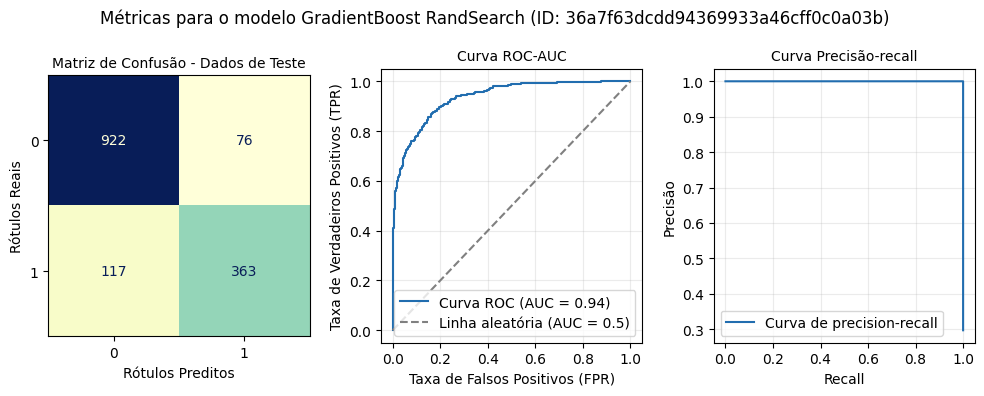

<Figure size 768x576 with 0 Axes>

In [31]:
VisualizationFunctions.cm_roc_recall_plot(
    grad_rs_name,
    grad_rs_model,
    X_train_processed,
    X_test_processed,
    y_train,
    y_test
)

### XGBoost

XGBoost RandSearch (ID: bdb77f6041574a5cac9e557b713931f5) 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       998
           1       0.82      0.75      0.78       480

    accuracy                           0.87      1478
   macro avg       0.85      0.83      0.84      1478
weighted avg       0.86      0.87      0.86      1478

ROC AUC score: 0.9354


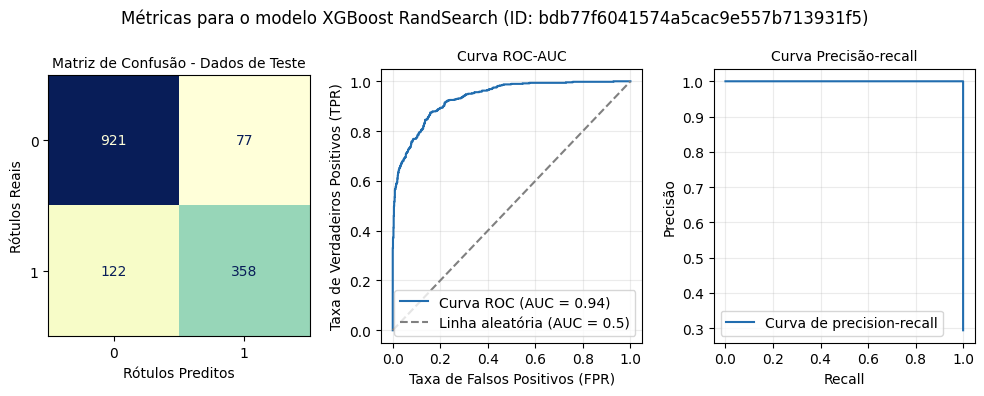

<Figure size 768x576 with 0 Axes>

In [32]:
VisualizationFunctions.cm_roc_recall_plot(
    xgb_rs_name,
    xgb_rs_model,
    X_train_processed,
    X_test_processed,
    y_train,
    y_test
)